# Вычисление емкостной размерности

## Теория

В [статье](https://habrahabr.ru/post/208368/) на хабре отлично и понятно расписана теория. В обчных статьях будут говорить о покрытиях и прочем общем математическом ~~булщите~~ важных вещах.

Но все же, в чем история? В том, что есть классические целочисленные размерности, а есть _фрактальные_. И они уже имеют непрерывное значение. И, помимо теории, это один из способов получать фичи для клссфикаци тексткурных изображений

Вычисляется это дело достаточно просто, если вкурить, что происходит. Пройдем по реализации:

## Реализация

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import pandas as pd
from io import BytesIO
from PIL import Image
from scipy.ndimage.filters import convolve, maximum_filter
from scipy.stats import linregress

Загружаем интересующее изображение

In [49]:
im = Image.open(BytesIO(requests.get('https://bentrubewriter.files.wordpress.com/2012/04/kochsnowflake400_1.jpg').content))
im = im.convert('1')

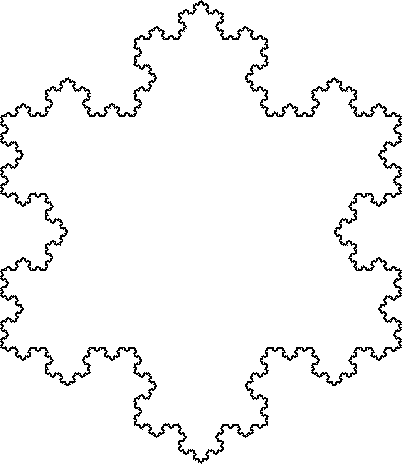

In [52]:
im

In [55]:
# Создаем матрицу
immat = np.array(im, dtype=np.int8)
# Меняем черный цвет на 1, а белый на 0
immat[immat == 1] = -1
immat[immat == 0] = 1
immat[immat == -1] = 0

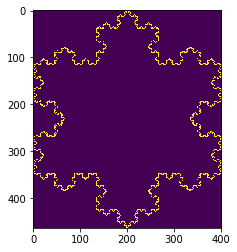

In [56]:
plt.imshow(immat)

И дальше самый сок всего этого поцесса

|В коде|В теории|
|:----:|:------:|
| `ws`  |$\epsilon$|
|`ns`|$N(\epsilon)$|

In [31]:
# Задаем размер квадрата, которым будем ходить по изображению
ws = range(1, 20)
# К-во квадратов, куда попал черный пиксель
ns = []
for w in ws:
    ns.append(np.sum(maximum_filter(immat, (w, w), mode='constant')[::w, ::w]))

Чтобы получилась вся красота надо еще взять логарифм от $N(\epsilon)$ и $\frac{1}{\epsilon}$

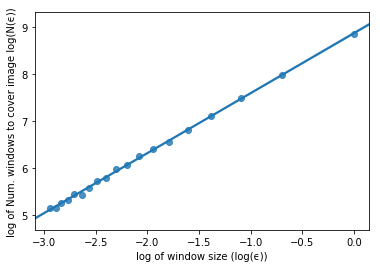

In [60]:
x = np.log(1/np.array(ws))
y = np.log(ns)

sns.regplot(pd.Series(x, name='log of window size (log(ϵ))'), 
            pd.Series(y, name='log of Num. windows to cover image log(N(ϵ))'),)

Затем сторим метод наименьших квадратов и к-т $a$ в модели будет значением емкстной (фрактальной) размерности

In [61]:
res = linregress(x, y)

In [62]:
res.slope

1.279016137267916

Данное значение соответсвует тому, что приводится в википедии, так что, наверно, все ок)